# Data Pre-processing and Exploration
## Project - Dishwasher-safe or Not
This notebook processes the images of utensils and cookware and creates a dataset for training a classifier which classifies whether an object is dishwasher-safe or not

### 1. Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle


### 2. Load Data 

In [2]:
positive_images_path = '/Users/anushree/Desktop/Dishwasher-safe Or Not/Data/final_data/dishwasher-safe'
negative_images_path = '/Users/anushree/Desktop/Dishwasher-safe Or Not/Data/final_data/not-dishwasher-safe'
ext = ['JPG', 'jpeg', 'png', 'jpg', 'gif', 'webp']

# Create a pandas dataframe
df = pd.DataFrame(columns = ['Filename','Class','Sub_Class'])

def load_data(df, images_path, y):  
    # get all sub-classes (sub-directories)
    subdirs = [s for s in os.listdir(images_path) if os.path.isdir(os.path.join(images_path,s))]
    # print(subdirs)
    for subdir in subdirs:
        path = os.path.join(images_path,subdir)
        with os.scandir(path) as files:
            for filename in files:
                f = os.path.join(path, filename)
                # checking if it is an image file
                if os.path.isfile(f) and f.split('.')[-1] in ext:
                    df.loc[len(df.index)] = [filename.name, y, subdir] 


load_data(df, positive_images_path,'dishwasher-safe')
load_data(df, negative_images_path, 'not-dishwasher-safe')

print(df.head())
print(df.info())

                                   Filename            Class     Sub_Class
0  Screen Shot 2023-09-22 at 3.46.27 PM.png  dishwasher-safe  dinner_knife
1  Screen Shot 2023-09-22 at 3.47.19 PM.png  dishwasher-safe  dinner_knife
2  Screen Shot 2023-09-22 at 3.45.26 PM.png  dishwasher-safe  dinner_knife
3  Screen Shot 2023-09-22 at 3.46.50 PM.png  dishwasher-safe  dinner_knife
4  Screen Shot 2023-09-22 at 3.47.44 PM.png  dishwasher-safe  dinner_knife
<class 'pandas.core.frame.DataFrame'>
Index: 1237 entries, 0 to 1236
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Filename   1237 non-null   object
 1   Class      1237 non-null   object
 2   Sub_Class  1237 non-null   object
dtypes: object(3)
memory usage: 38.7+ KB
None


In [3]:
# Save to csv
df.to_csv('/Users/anushree/Desktop/Dishwasher-safe Or Not/Data/data.csv', sep=',')

## 3. Data Exploration
### 3.1 Plot class distributions

In [4]:
# Get number of images belonging to each class 
class_counts = df['Class'].value_counts()
class_counts

Class
dishwasher-safe        716
not-dishwasher-safe    521
Name: count, dtype: int64

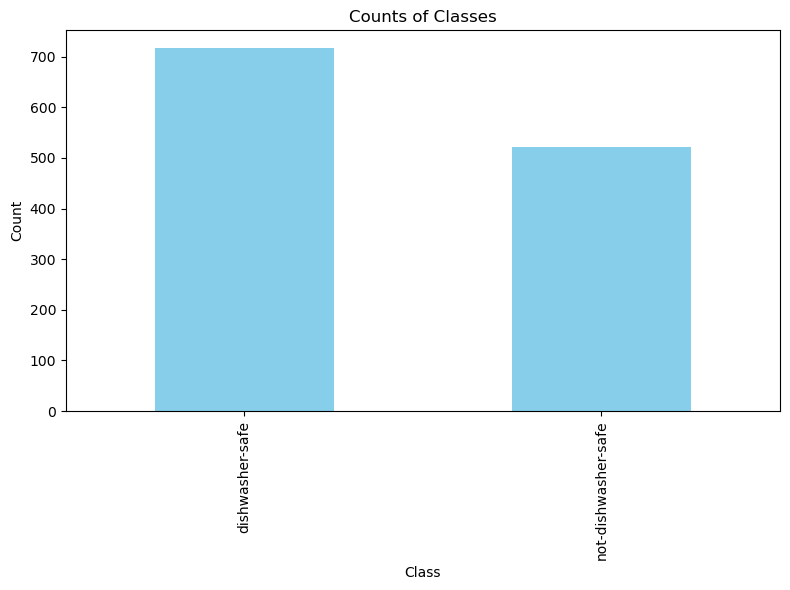

In [5]:
# Create a bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# Display the chart
plt.tight_layout()

# Save the graph
plt.savefig("/Users/anushree/Desktop/Dishwasher-safe Or Not/class_dist.png")

plt.show()

In [6]:
# Get number of images belonging to each sub-class
sub_class_counts = df['Sub_Class'].value_counts()
sub_class_counts

Sub_Class
mug                       51
grater                    40
knife                     38
glass_plastic_tumbler     36
kadai                     27
tava                      26
tiffin                    26
wooden_spoon              26
pot                       26
dinner_knife              25
spoon                     25
bottle_opener             25
circle_cake_pan           25
peeler                    25
iron_cast_skillet         25
plate                     25
tongs                     25
fork                      25
belan                     24
wooden_spatula            24
rectangle_cake_pan        24
steel_bowl                24
pizza_cutter              24
blender_jug               24
blender_blades            24
whisk                     24
pressure_cooker           24
wooden_chopping_board     23
can_opener                23
potato_masher             23
bowl                      23
silicone_spatula          22
laddle                    22
wooden_handle_strainer    22
stra

In [7]:
print(len(sub_class_counts))

55


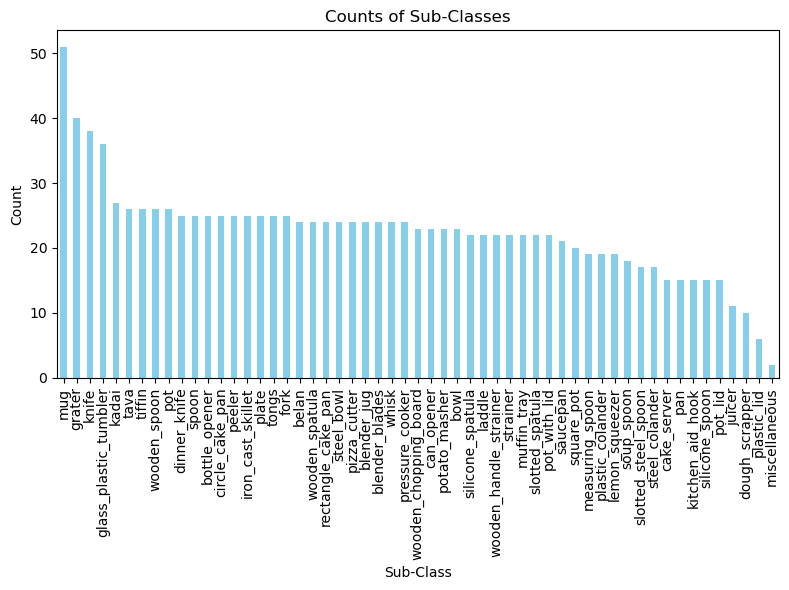

In [8]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sub_class_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Sub-Classes')
plt.xlabel('Sub-Class')
plt.ylabel('Count')

# Display the chart
plt.tight_layout()
plt.savefig("/Users/anushree/Desktop/Dishwasher-safe Or Not/sub_class_dist.png")

plt.show()

Author: **Anushree Das**

Social Media: [LinkedIn](https://www.linkedin.com/in/anushree-s-das)

Link to blog post: [Image Dataset Analysis using Python Libraries — Pandas and Matplotlib](https://medium.com/@anushreedas.2710/image-dataset-analysis-using-python-libraries-pandas-and-matplotlib-a640e5f59805)